# Battery Charge Time
## NVDC Notebook Architecture
#### For the duration of the charging period, the instantaneous battery current will depend on the state of the whole system, which consists of:


*   Adaptor power rating - minus efficiency losses in the charger power train.
*   Charger max current - a new control loop which will protect the charger and inductor. 
*   System load - adds to charger load and can reduce available charging current. If Psys > Padaptor, then Ibattery will be < 0
*   Battery voltage - directly impacts System Voltage in the NVDC architecture. Also, for LiPO batteries, Vbat is current dependent. 
*   Battery current - raises System Voltage through the voltage drop across battery charge path resistence

In [1]:
import batterycharger as bc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
plt.style.use('seaborn')
from IPython.display import Image




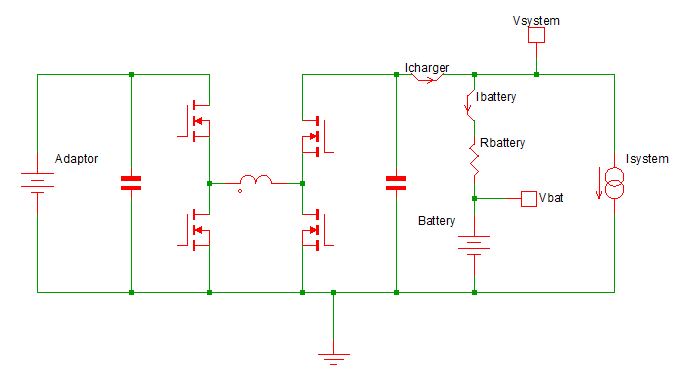

In [2]:
Image('charger.png', width=800)

### Initial State of Charge

In [5]:
soc=0.1
padaptor=65
psystem=0
ichargermax=7

### Inputs and Results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025048064A58>,
      dtype=object)

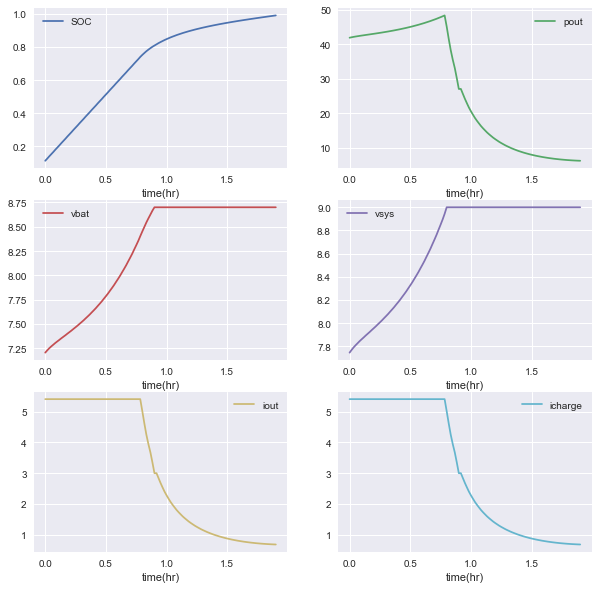

In [11]:

data=bc.batterystate_vs_t(bc.Charger(bc.Adapter(power=padaptor),bc.Battery(soc=soc),psystem=psystem, imax=ichargermax))
chargetime = str(data[0][-1])+'hrs'
df=pd.DataFrame(np.array(data[1:]).T,index=data[0],columns=['SOC','pout','vbat','vsys','iout','icharge'])
df.index.name='time(hr)'
df.plot(subplots=True, layout=(3,2),figsize=(10,10),sharex=False,use_index=True)




In [20]:
socframe=df['SOC']

In [33]:
socframe

time(hr)
0.000    0.113333
0.017    0.126667
0.033    0.140000
0.050    0.153333
0.067    0.166667
0.083    0.180000
0.100    0.193333
0.117    0.206667
0.133    0.220000
0.150    0.233333
0.167    0.246667
0.183    0.260000
0.200    0.273333
0.217    0.286667
0.233    0.300000
0.250    0.313333
0.267    0.326667
0.283    0.340000
0.300    0.353333
0.317    0.366667
0.333    0.380000
0.350    0.393333
0.367    0.406667
0.383    0.420000
0.400    0.433333
0.417    0.446667
0.433    0.460000
0.450    0.473333
0.467    0.486667
0.483    0.500000
           ...   
1.417    0.934890
1.433    0.937228
1.450    0.939518
1.467    0.941764
1.483    0.943968
1.500    0.946132
1.517    0.948258
1.533    0.950348
1.550    0.952405
1.567    0.954431
1.583    0.956426
1.600    0.958393
1.617    0.960334
1.633    0.962250
1.650    0.964142
1.667    0.966012
1.683    0.967862
1.700    0.969692
1.717    0.971504
1.733    0.973300
1.750    0.975079
1.767    0.976844
1.783    0.978596
1.800    0.980335
1

In [ ]:
(2.15-2.017)*60

In [ ]:
(7/6)**2